# Análisis de Fourier con Generación Numérica de Señales

En esta serie de experimentos, analizaremos cómo diferentes factores afectan la densidad espectral de potencia (PSD) de una señal periódica sintetizada numéricamente.

## Experimento 1: Efecto de la Frecuencia de Muestreo en el Ancho de Banda de la PSD

/home/yeison/Documents/venvs/dsp/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:790: UserWarning: nperseg = 256 is greater than input length  = 20, using nperseg = 20
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/home/yeison/Documents/venvs/dsp/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:790: UserWarning: nperseg = 256 is greater than input length  = 50, using nperseg = 50
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/home/yeison/Documents/venvs/dsp/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:790: UserWarning: nperseg = 256 is greater than input length  = 100, using nperseg = 100
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/home/yeison/Documents/venvs/dsp/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:790: UserWarning: nperseg = 256 is greater than input length  = 200, using nperseg = 200
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverl

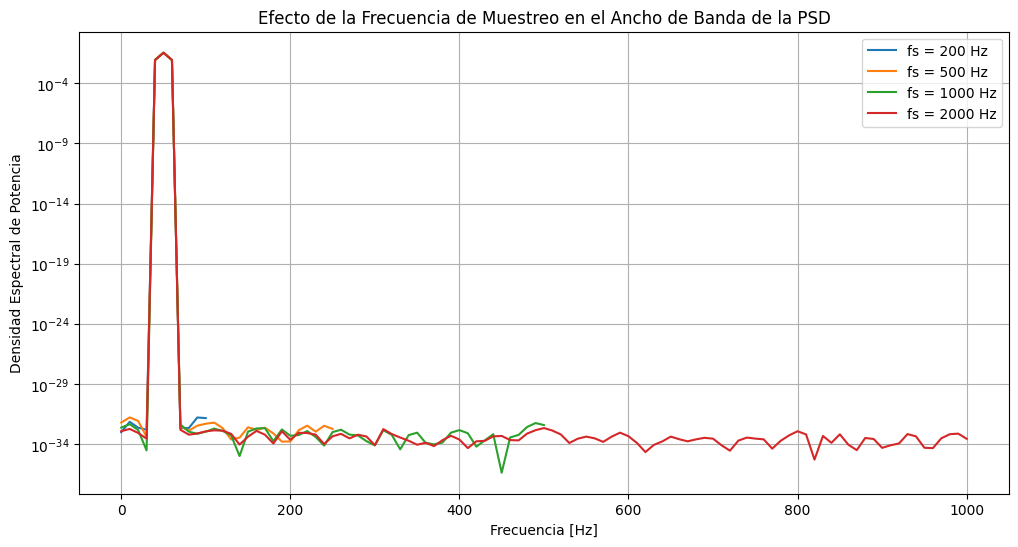

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# Parámetros
frecuencia_real = 50  # Frecuencia de la señal en Hz
num_ciclos = 5  # Número de ciclos de la señal a capturar
frecuencias_de_muestreo = [200, 500, 1000, 2000]  # Hz

plt.figure(figsize=(12, 6))
for fs in frecuencias_de_muestreo:
    t = np.arange(0, num_ciclos / frecuencia_real, 1/fs)
    señal = np.sin(2 * np.pi * frecuencia_real * t)
    
    # Cálculo de la PSD
    freqs, psd = welch(señal, fs, nperseg=256)
    plt.semilogy(freqs, psd, label=f'fs = {fs} Hz')

plt.title("Efecto de la Frecuencia de Muestreo en el Ancho de Banda de la PSD")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Densidad Espectral de Potencia")
plt.legend()
plt.grid()
plt.show()

## Experimento 2: Efecto del Tiempo de Captura en la Resolución de la PSD

/home/yeison/Documents/venvs/dsp/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:790: UserWarning: nperseg = 256 is greater than input length  = 40, using nperseg = 40
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


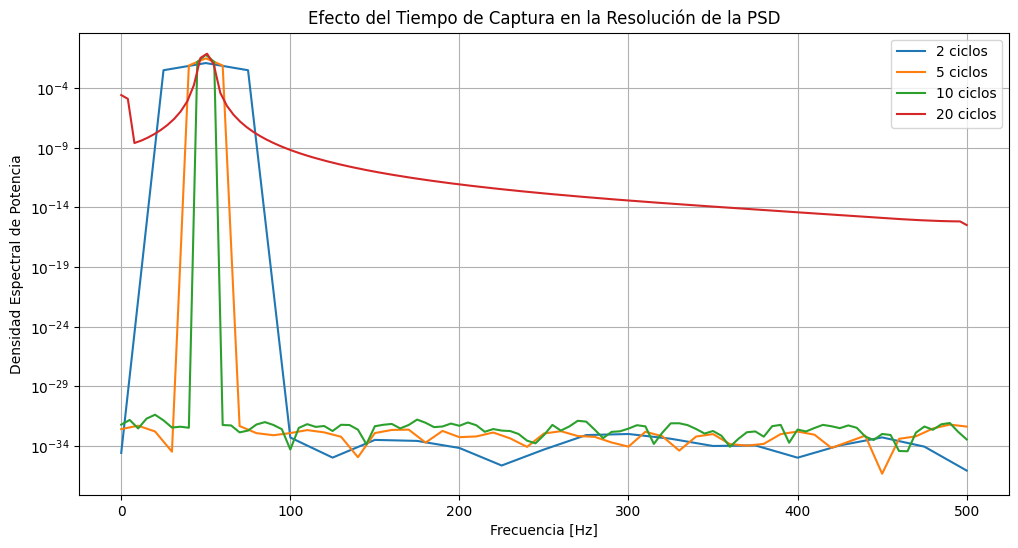

In [2]:
fs = 1000  # Frecuencia de muestreo fija
num_ciclos_variados = [2, 5, 10, 20]  # Cantidad de ciclos de la señal

plt.figure(figsize=(12, 6))
for num_ciclos in num_ciclos_variados:
    t = np.arange(0, num_ciclos / frecuencia_real, 1/fs)
    señal = np.sin(2 * np.pi * frecuencia_real * t)
    
    # Cálculo de la PSD
    freqs, psd = welch(señal, fs, nperseg=256)
    plt.semilogy(freqs, psd, label=f'{num_ciclos} ciclos')

plt.title("Efecto del Tiempo de Captura en la Resolución de la PSD")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Densidad Espectral de Potencia")
plt.legend()
plt.grid()
plt.show()

## Experimento 3: Efecto del Tiempo de Análisis en el Espectro con Ruido

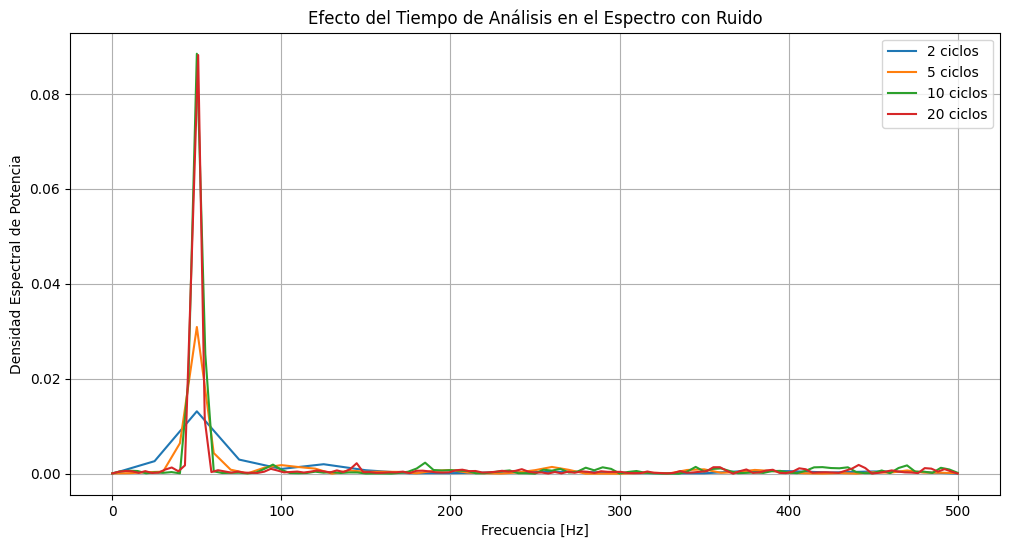

In [12]:
fs = 1000  # Frecuencia de muestreo fija
nivel_de_ruido = 0.5  # Intensidad fija del ruido
num_ciclos_variados = [2, 5, 10, 20]  # Diferentes duraciones de análisis

plt.figure(figsize=(12, 6))
for num_ciclos in num_ciclos_variados:
    t = np.arange(0, num_ciclos / frecuencia_real, 1/fs)
    señal = np.sin(2 * np.pi * frecuencia_real * t) + nivel_de_ruido * np.random.randn(len(t))
    
    # Cálculo de la PSD
    freqs, psd = welch(señal, fs, nperseg=256)
    plt.semilogy(freqs, psd, label=f'{num_ciclos} ciclos')

plt.title("Efecto del Tiempo de Análisis en el Espectro con Ruido")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Densidad Espectral de Potencia")
plt.legend()
plt.grid()
plt.show()